# Black Friday Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
## making the copy of train and test data

train_cpy = train.copy()
test_cpy = test.copy()

In [7]:
train.shape

(550068, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
train.Product_ID.nunique()

3631

In [12]:
train.User_ID.nunique()

5891

In [13]:
train_cat = train.select_dtypes(include='object')
## having the cat(object column names)
train_cat.columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [14]:
## dropping the Product_Id
train_cat.drop(['Product_ID'], axis=1, inplace=True)

C:\Users\91976\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
train_cat.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

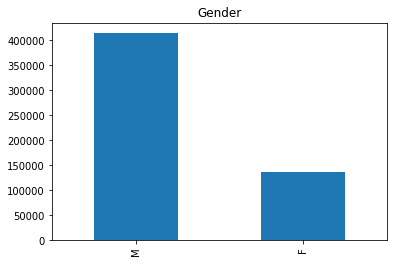

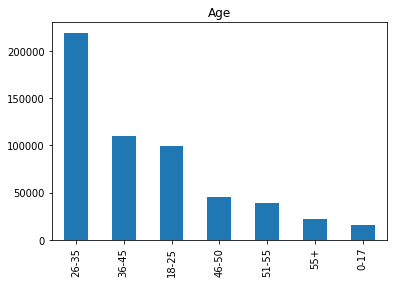

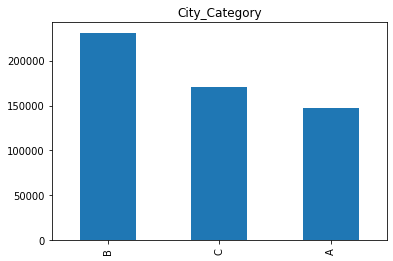

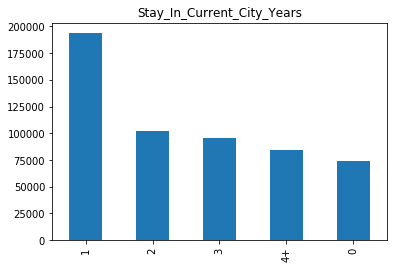

In [16]:
for i in train_cat.columns:
    train[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

In [17]:
train_numeric = train.select_dtypes(include=['int64', 'float64'])

## numerical data
train_numeric.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
## droping the UserID
train_numeric.drop(["User_ID"], axis=1, inplace=True)
train_numeric.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

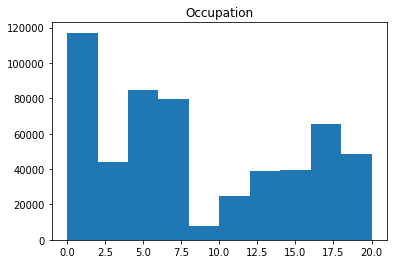

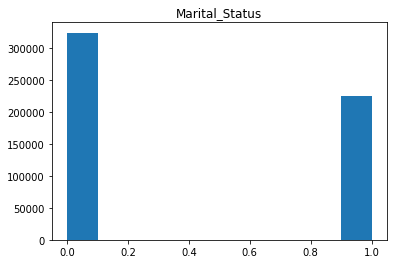

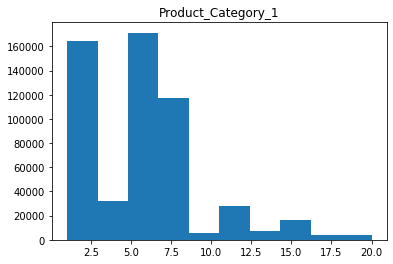

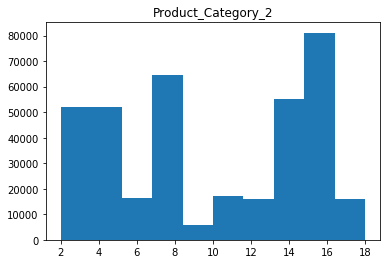

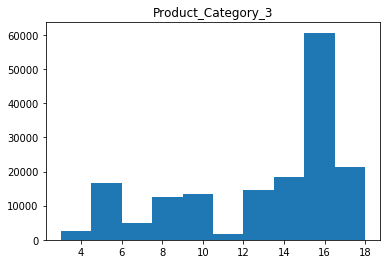

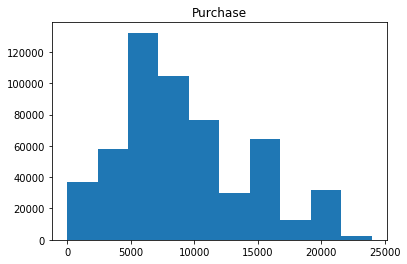

In [19]:
for i in train_numeric.columns:
    plt.hist(train[i])
    plt.title('{0}'.format(i))
    plt.show()

In [20]:
train_numeric.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


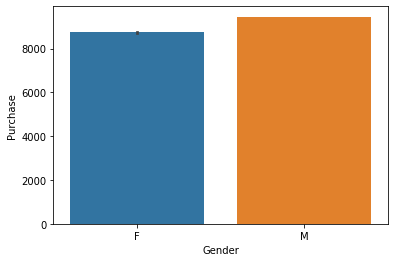

In [21]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'Gender', y = 'Purchase', data=train)

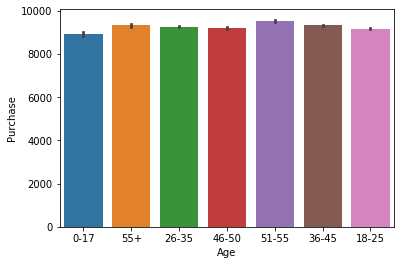

In [22]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'Age', y='Purchase', data=train)

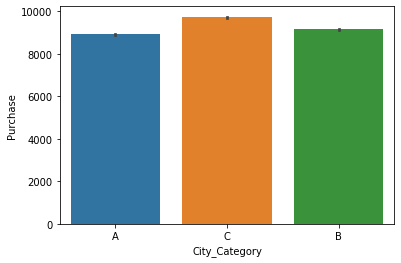

In [23]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'City_Category', y = 'Purchase', data=train)

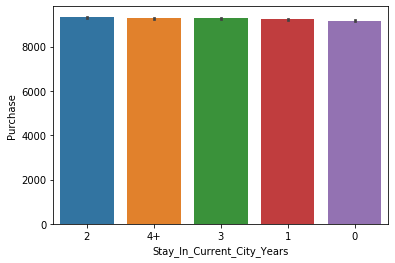

In [24]:
## Bar-plot with default statistics-mean
sns.barplot(x="Stay_In_Current_City_Years", y='Purchase', data=train)

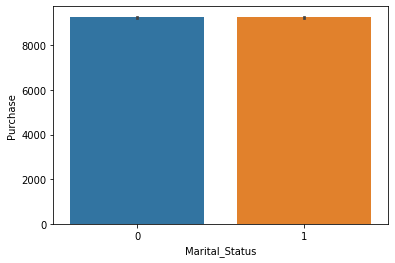

In [25]:
# bar plot with default statistic=mean
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

In [26]:
train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_2_count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_count'] = test['Product_Category_2'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_3_count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_count'] = test['Product_Category_3'].apply(lambda x:pc1_count_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [27]:
train["User_ID_MinPrice"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["User_ID_MaxPrice"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["User_ID_MeanPrice"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


train["Product_ID_MinPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["Product_ID_MaxPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["Product_ID_MeanPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))

In [28]:
userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['User_ID_25PercPrice'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['User_ID_75PercPrice'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_ID_25PercPrice'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_ID_75PercPrice'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))

In [29]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,...,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [30]:
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Product_Category_1_Count       0.00
Product_Category_2_count      31.57
Product_Category_3_count      69.67
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [31]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
Product_Category_1_Count       0.00
Product_Category_2_count       0.00
Product_Category_3_count       0.00
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Age']=le.fit_transform(train['Age'])
test['Age']=le.fit_transform(test['Age'])

train['City_Category']=le.fit_transform(train['City_Category'])
test['City_Category']=le.fit_transform(test['City_Category'])

train['Stay_In_Current_City_Years']=le.fit_transform(train['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years']=le.fit_transform(test['Stay_In_Current_City_Years'])

# train['Gender']=train['Gender'].map({'M':1, 'F':0})
# test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [33]:
pd.set_option('display.max_columns', 100)
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.50,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.50,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.50,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.50,12305.5,1378.00,1736.00
4,1000002,P00285442,M,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.00,11973.0,6174.50,8082.50
5,1000003,P00193542,M,2,15,0,3,0,1,2.0,NaN,15227,140378,49217.0,NaN,29,615,3646,19631,11780.517241,3828,19698,14318.772358,6953.00,15592.0,11722.50,15821.00
6,1000004,P00184942,M,4,7,1,2,1,1,8.0,17.0,19215,140378,64088.0,16702.0,14,1440,481,19693,14747.714286,3809,19707,16899.227083,15488.50,19087.0,15421.25,19362.00
7,1000004,P00346142,M,4,7,1,2,1,1,15.0,NaN,15854,140378,37855.0,NaN,14,593,481,19693,14747.714286,3847,19698,14169.618887,15488.50,19087.0,11730.00,15837.00
8,1000004,P0097242,M,4,7,1,2,1,1,16.0,NaN,15686,140378,43255.0,NaN,14,912,481,19693,14747.714286,3936,19708,15947.346491,15488.50,19087.0,15263.25,19178.75
9,1000005,P00274942,M,2,20,0,1,1,8,NaN,NaN,7871,113925,NaN,NaN,106,793,1938,21021,7745.292453,1940,10082,8068.920555,4551.75,8823.0,7762.00,9844.00


In [34]:
train['Gender']=train['Gender'].map({'M':1, 'F':0})
test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [35]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [36]:
## filling missing values in product categories 2 & 3 by by any constant number say 0


train['Product_Category_2']=train['Product_Category_2'].fillna(0)
test['Product_Category_2']=test['Product_Category_2'].fillna(0)

train['Product_Category_3']=train['Product_Category_3'].fillna(0)
test['Product_Category_3']=test['Product_Category_3'].fillna(0)

train["Product_Category_2_count"]=train["Product_Category_2_count"].fillna(0)
test["Product_Category_2_count"]=test["Product_Category_2_count"].fillna(0)

train["Product_Category_3_count"]=train["Product_Category_3_count"].fillna(0)
test["Product_Category_3_count"]=test["Product_Category_3_count"].fillna(0)

In [37]:
## checking the nan values again
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
Product_Category_1_Count      0.0
Product_Category_2_count      0.0
Product_Category_3_count      0.0
User_ID_Count                 0.0
Product_ID_Count              0.0
User_ID_MinPrice              0.0
User_ID_MaxPrice              0.0
User_ID_MeanPrice             0.0
Product_ID_MinPrice           0.0
Product_ID_MaxPrice           0.0
Product_ID_MeanPrice          0.0
User_ID_25PercPrice           0.0
User_ID_75PercPrice           0.0
Product_ID_25PercPrice        0.0
Product_ID_75PercPrice        0.0
dtype: float64

In [38]:
train=train.drop(['User_ID','Product_ID'],axis=1)
test=test.drop(['User_ID','Product_ID'],axis=1)

In [39]:
q1 = train['Purchase'].quantile(0.25)
q3 = train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
train = train[(train['Purchase'] > fence_low) & (train['Purchase'] < fence_high)]

In [40]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,0,0,10,0,2,0,3,0.0,0.0,8370,20213,0.0,0.0,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,0,0,10,0,2,0,12,0.0,0.0,1422,3947,0.0,0.0,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,0,0,10,0,2,0,12,14.0,0.0,1057,3947,55108.0,0.0,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1,6,16,2,4,0,8,0.0,0.0,7969,113925,0.0,0.0,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [41]:
X=train.drop('Purchase',1)
y=train['Purchase']

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score

In [43]:
## Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [10], 'max_features': [10], 'min_samples_leaf': [100], 'min_samples_split': [200], 'n_estimators': [200]}

## Create a based model
rf = RandomForestRegressor()
# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [44]:
## Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
##printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7486113992354678
{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [46]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [47]:
y_test_pred=grid_search.predict(test)

In [48]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred,columns=['Purchase'])],1)
finalpred.to_csv("RF.csv",index=False)

### XGBoost

In [49]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor

In [50]:
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
plst = list(params.items())
num_rounds = 1100

In [51]:
xgb=XGBRegressor()

In [52]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
y_test_pred_x=xgb.predict(test)

C:\Users\91976\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [54]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_x,columns=['Purchase'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Light GBM

In [57]:
import lightgbm as lgb

In [58]:
lgbm=lgb.LGBMRegressor()

In [59]:
params={'colsample_bytree': [0.7], 'learning_rate': [0.07], 'max_depth': [15], 'min_child_weight': [4],
         'n_estimators': [100], 'subsample': [0.5]}

params={'num_leaves':[200], 'objective':['regression'],'max_depth':[15],'learning_rate':[.1],'max_bin':[200]}

In [60]:
model = GridSearchCV(lgbm,
                         params,
                         cv = 3,
                         n_jobs = 5,
                         verbose=True)

In [61]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:   50.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0,
                                     silent='warn', subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.1], 'max_bin': [200],
                         'max_depth': [15], 'num_leaves': [200],
            

In [62]:
y_test_pred_l=model.predict(test)

In [63]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_l,columns=['Purchase'])],1)
finalpred.to_csv("lgbm.csv",index=False)

### Cat-Boost

In [64]:
import catboost as cb

In [65]:
model=cb.CatBoostRegressor()

In [66]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [15]}

model = GridSearchCV(model,
                        grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [67]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:  5.5min finished


0:	learn: 4588.6583441	total: 595ms	remaining: 9m 54s
1:	learn: 4283.3683239	total: 1.27s	remaining: 10m 35s
2:	learn: 4017.1240409	total: 1.77s	remaining: 9m 49s
3:	learn: 3787.1038880	total: 2.13s	remaining: 8m 51s
4:	learn: 3589.6160636	total: 2.64s	remaining: 8m 45s
5:	learn: 3416.8443510	total: 3.1s	remaining: 8m 34s
6:	learn: 3270.1353215	total: 3.54s	remaining: 8m 22s
7:	learn: 3144.8494663	total: 3.91s	remaining: 8m 4s
8:	learn: 3038.9091171	total: 4.24s	remaining: 7m 47s
9:	learn: 2949.9834377	total: 4.61s	remaining: 7m 36s
10:	learn: 2874.8885745	total: 4.99s	remaining: 7m 28s
11:	learn: 2811.0694512	total: 5.33s	remaining: 7m 18s
12:	learn: 2758.4528520	total: 5.7s	remaining: 7m 13s
13:	learn: 2714.8743666	total: 6.07s	remaining: 7m 7s
14:	learn: 2678.1847200	total: 6.46s	remaining: 7m 4s
15:	learn: 2647.2237976	total: 7.07s	remaining: 7m 14s
16:	learn: 2620.9894700	total: 7.63s	remaining: 7m 20s
17:	learn: 2599.5555276	total: 8.13s	remaining: 7m 23s
18:	learn: 2581.1489682	

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020D05CB89C8>,
             iid='deprecated', n_jobs=5,
             param_grid={'depth': [10], 'l2_leaf_reg': [15],
                         'learning_rate': [0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [68]:
y_test_predict_c=model.predict(test)

In [69]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_predict_c,columns=['Purchase'])],1)
finalpred.to_csv("catb_1.csv",index=False)

### Stacked Model

Creating 2 LightBoost Models both with different learning rates and different set of features for both of them

Light Boost model 1 (learning rate = 0.5), and features set = alist + blist (mentioned below)

Light Boost model 2 (learinng rate = 0.8), and features set = alist + clist** (mentioned below)

In [70]:
alist = ['Gender',
'Age',
'Occupation',
'City_Category',
'Stay_In_Current_City_Years',
'Marital_Status',
'Product_Category_1',
'Product_Category_2',
'Product_Category_3',
'User_ID_Count',
'Product_ID_Count']
         
blist = ['User_ID_MinPrice',
'User_ID_MaxPrice',
'User_ID_MeanPrice',
'Product_ID_MinPrice',
'Product_ID_MaxPrice',
'Product_ID_MeanPrice']

clist = ['User_ID_25PercPrice',
'User_ID_75PercPrice',
'Product_ID_25PercPrice',
'Product_ID_75PercPrice',
'Product_Category_1_Count',
'Product_Category_2_count',
'Product_Category_3_count',]

In [71]:
#XGB model 1 dataframe
train1 = train[alist+blist]
test1 = test[alist+blist]

#XGB model 2 dataframe 
train2 = train[alist+clist]
test2 = test[alist+clist]

In [72]:
# train1_x=train1.drop(['Purchase'],axis=1)
# train_1_y=train1['Purchase']

In [73]:
mod_1=lgb.LGBMRegressor(learning_rate=[.2],importance_type='gain')
mod_2=lgb.LGBMRegressor(learning_rate=[.4],importance_type='gain')

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,y,test_size=0.3,random_state=101)

In [75]:
mod_1.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=[0.2], max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
y_test=mod_1.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2460.6276578748552


In [78]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_1.feature_importances_})

keys = list(X_train.columns)
values = list(mod_1.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_MeanPrice,94.010000
1,User_ID_MeanPrice,3.600000
2,User_ID_Count,0.520000
3,User_ID_MaxPrice,0.490000
4,Product_ID_MaxPrice,0.310000
5,User_ID_MinPrice,0.240000
6,Product_ID_MinPrice,0.140000
7,Product_ID_Count,0.120000
8,Gender,0.110000
9,Age,0.100000


Text(0, 0.5, 'Features')

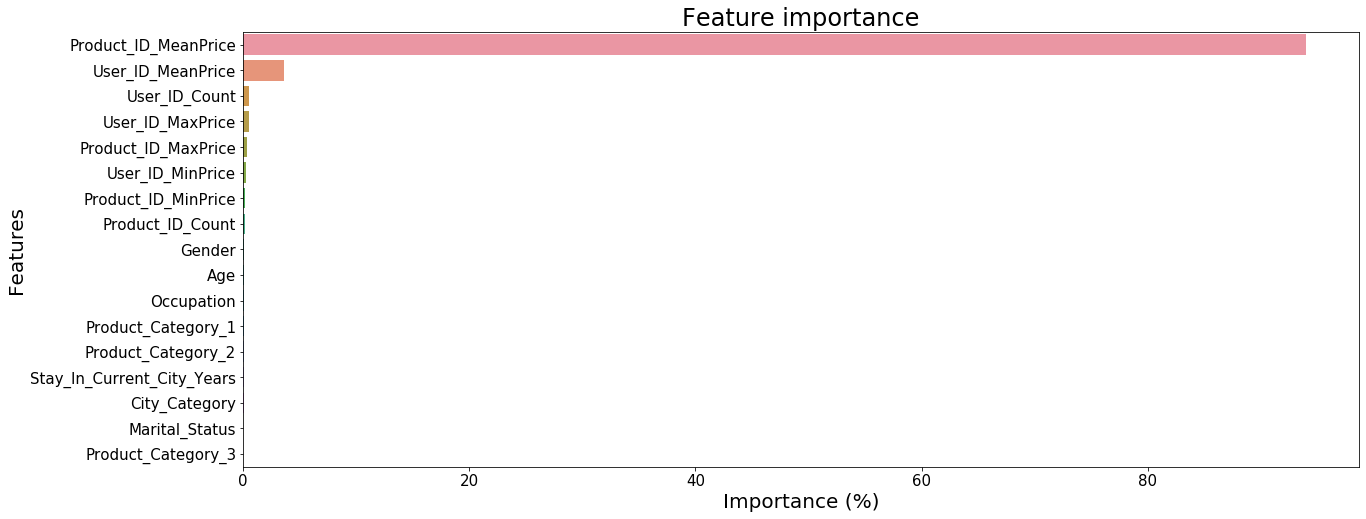

In [79]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [80]:
#prediction1
pred_lgbm_m1 = mod_1.predict(test1)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m1,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod1.csv',index=False)

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(train2,y,test_size=0.3,random_state=101)

In [82]:
mod_2.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=[0.4], max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [83]:
y_test=mod_2.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2465.545887916646


In [85]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_2.feature_importances_})

keys = list(X_train.columns)
values = list(mod_2.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})


,Features,Importance (%)
0,Product_ID_75PercPrice,79.310000
1,Product_ID_25PercPrice,14.020000
2,User_ID_75PercPrice,2.440000
3,User_ID_25PercPrice,2.290000
4,User_ID_Count,0.620000
5,Product_ID_Count,0.240000
6,Occupation,0.200000
7,Product_Category_1,0.180000
8,Age,0.150000
9,Gender,0.090000


Text(0, 0.5, 'Features')

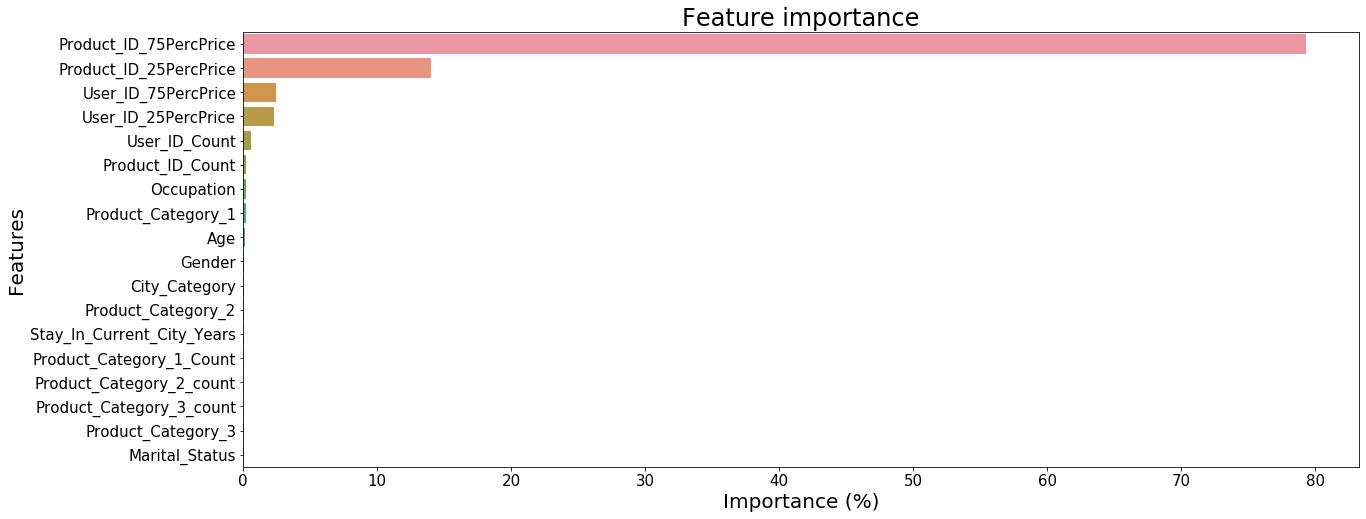

In [86]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [87]:
#prediction2
pred_lgbm_m2 = mod_2.predict(test2)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m2,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod2.csv',index=False)

In [90]:
## Weighted average of above two models
sub['Purchase'] = 0.5*pred_lgbm_m1 + 0.5*pred_lgbm_m2
sub.to_csv('Submission.csv',index=False)

In [89]:
### CATBoost is the final model, as it has performed better than the stacked model